In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
from scipy import stats
import time
from matplotlib.colors import LogNorm
from numpy.random import randn
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import os
import process_abalone_utility as pau

/data/abalone/ABALONE_RampingUp/2021_08_12_T1603_ABALONE_14kV_SiPM2_32V_LED300V.dat Number of events 595343.0
Total events number: 595343
event n. 0 time to process: 0.02
event n. 100000 time to process: 11.71
event n. 200000 time to process: 23.39
event n. 300000 time to process: 35.07
event n. 400000 time to process: 46.70
event n. 500000 time to process: 58.32


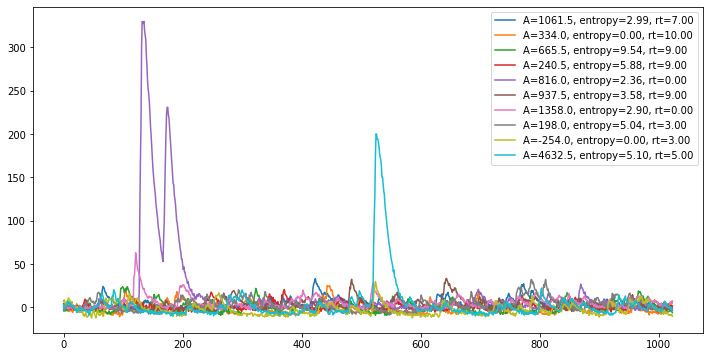

In [2]:
file_LED = '/data/abalone/ABALONE_RampingUp/2021_08_12_T1603_ABALONE_14kV_SiPM2_32V_LED300V.dat'
avolt = 14
dataLED = pau.process_abalone_data(filename=file_LED,nn=0,nplot=10,volts=avolt,sipmv=32,ledv='3')

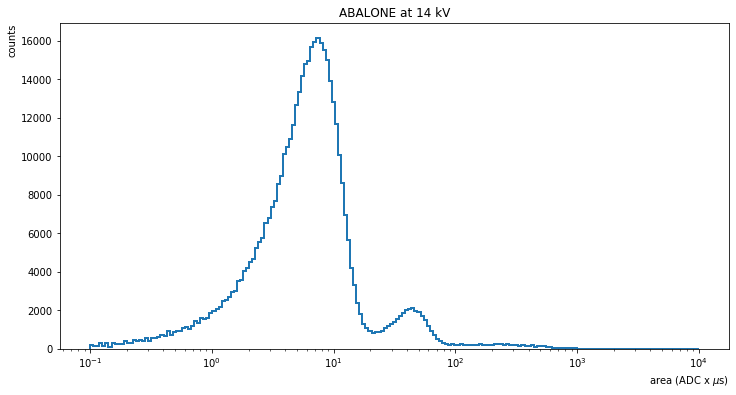

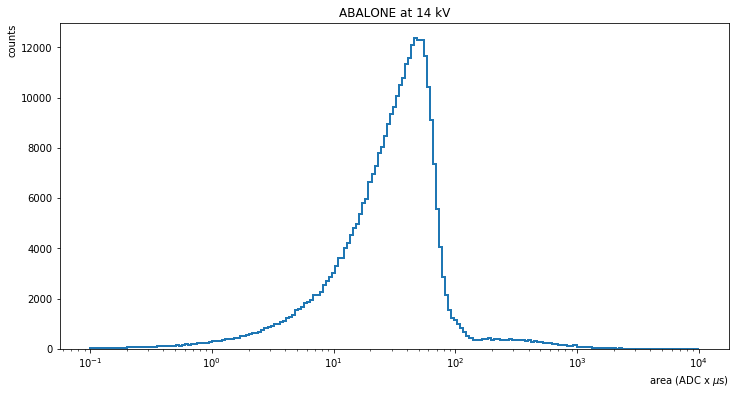

<Figure size 864x432 with 0 Axes>

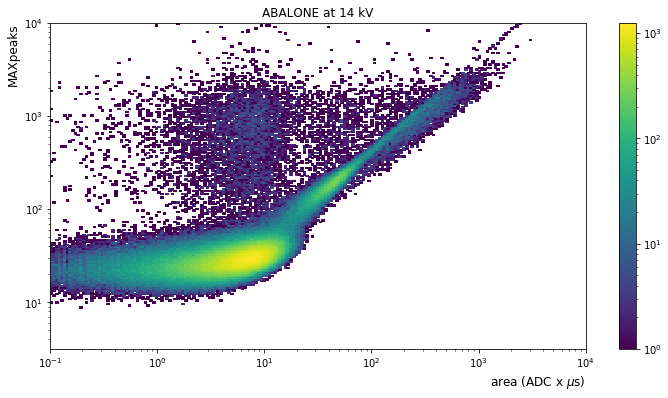

<Figure size 864x432 with 0 Axes>

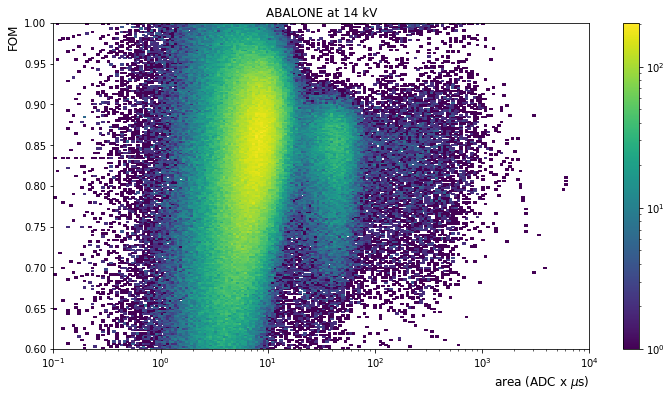

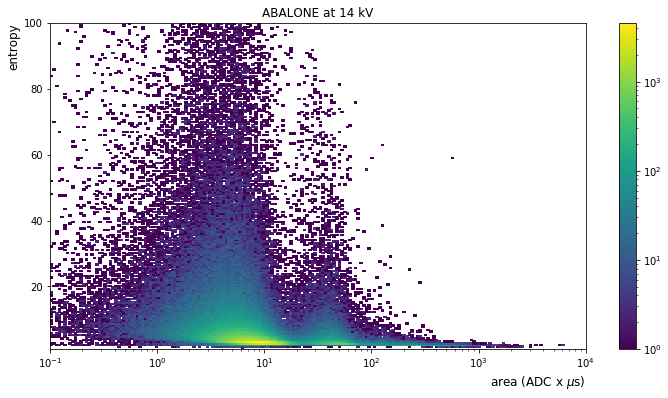

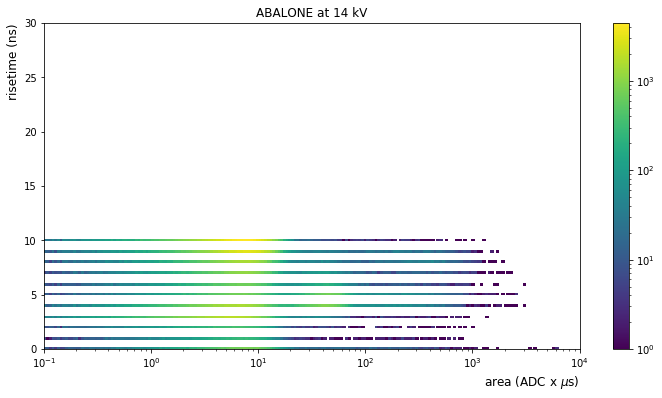

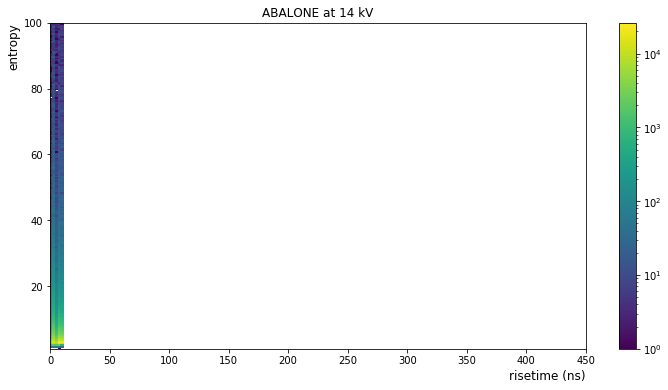

In [3]:
pau.plot_data(data=dataLED,fvolt=avolt,low=-1, high=4,low_max=0.5,high_max=4,low_en=1, high_en=100,
              low_fom=0.6,high_fom=1,high_rt=30)

/data/abalone/ABALONE_RampingUp/2021_08_12_T1603_ABALONE_14kV_SiPM2_32V_LED300V.dat Number of events 595343.0
n. events 0 waveform samples 1024
Events rejected by areaup 0 -> 0.0 %

n. events 114119 waveform samples 1024
Events rejected by areadown 114119 -> 19.168613723517367 %

n. events 0 waveform samples 1024
Events rejected by entropy 0 -> 0.0 %

n. events 0 waveform samples 1024
Events rejected by max 0 -> 0.0 %

n. events 349 waveform samples 1024
Events rejected by risetime 349 -> 0.05862166851714054 %

n. events 531819 waveform samples 1024
Events rejected by max position 531819 -> 89.32984850749904 %

n. events 44643 waveform samples 1024


/usr/share/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block2_values] [items->['area_filt', 'width']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


Events selected  44643 -> 7.498702428683969 %


<Figure size 864x432 with 0 Axes>

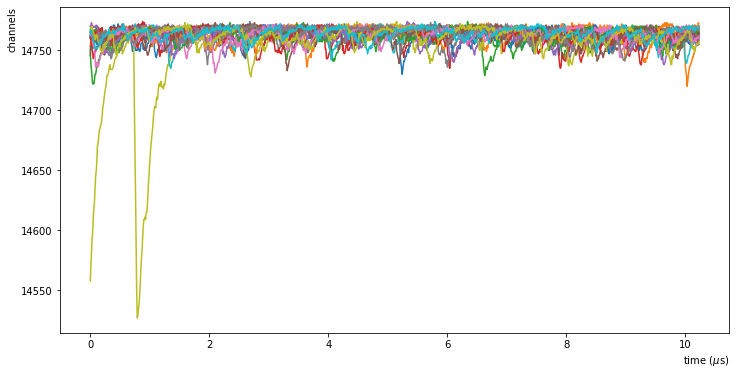

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

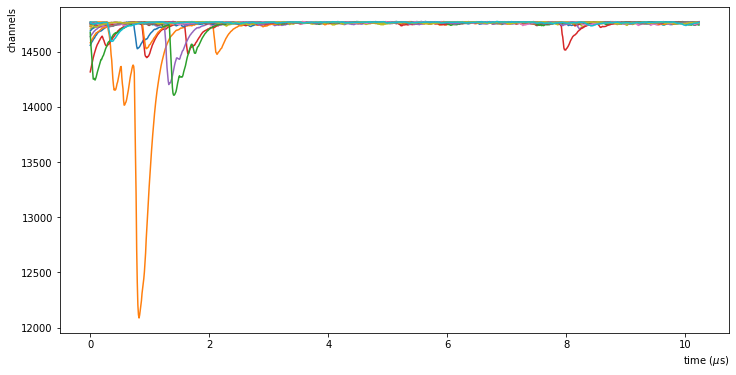

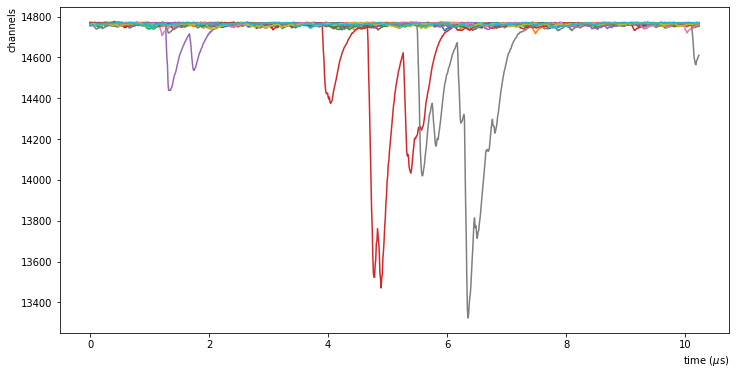

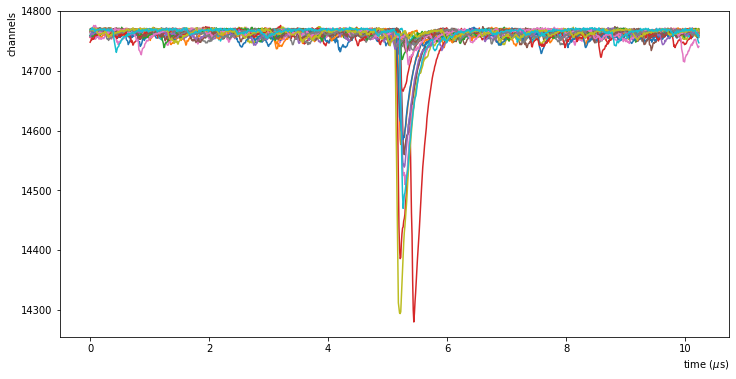

In [4]:
new_data, new_wf = pau.select_data(dataLED,filename=file_LED,entr_cut=200,max_cut=1,area_cut=(0,1e7),
                                   pos_cut=(500,550),rt_cut=0,events=20, save=1,volts=avolt,sipmv=32,ledv='3')

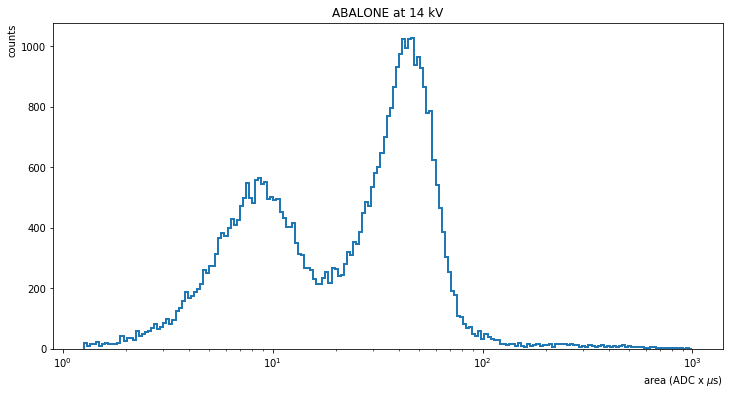

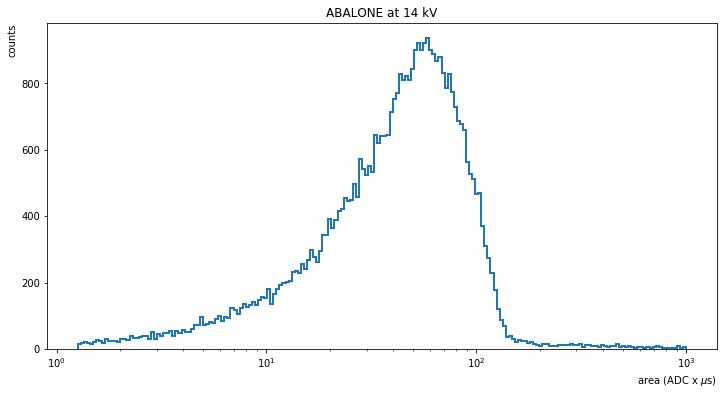

<Figure size 864x432 with 0 Axes>

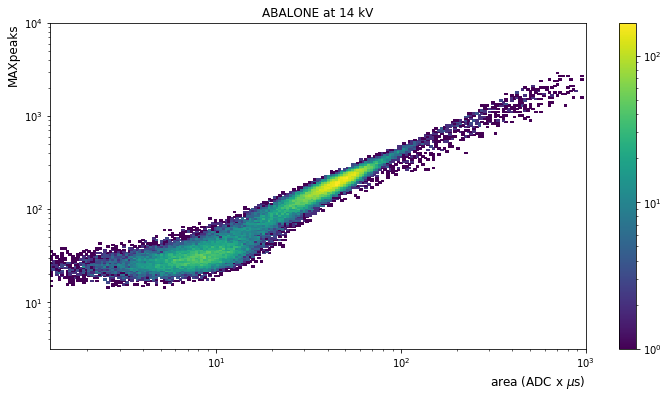

<Figure size 864x432 with 0 Axes>

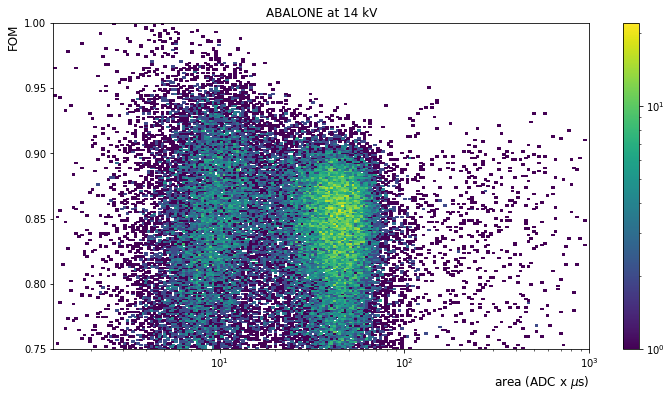

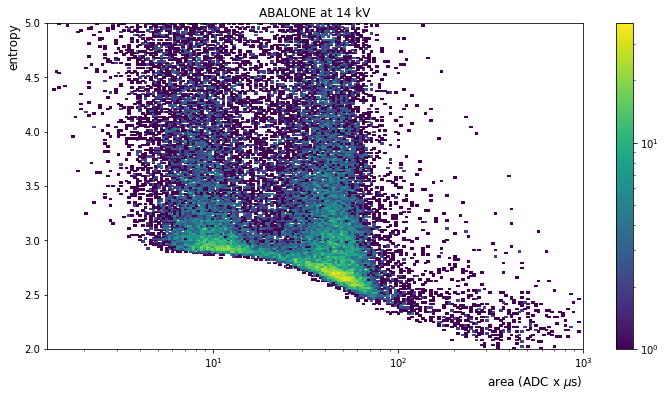

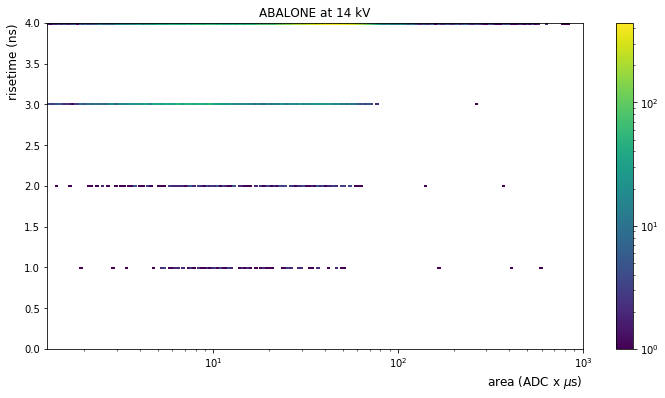

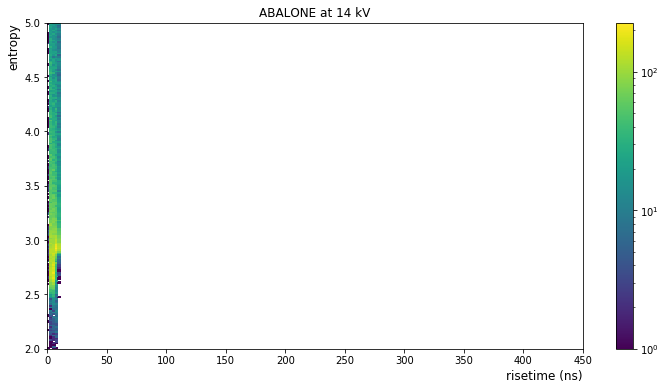

In [5]:
pau.plot_data(data=new_data,fvolt=avolt,low=0.1, high=3,low_max=0.5,high_max=4,low_en=2, high_en=5,
          low_fom=0.75,high_fom=1)

n. events 6725 waveform samples 1024


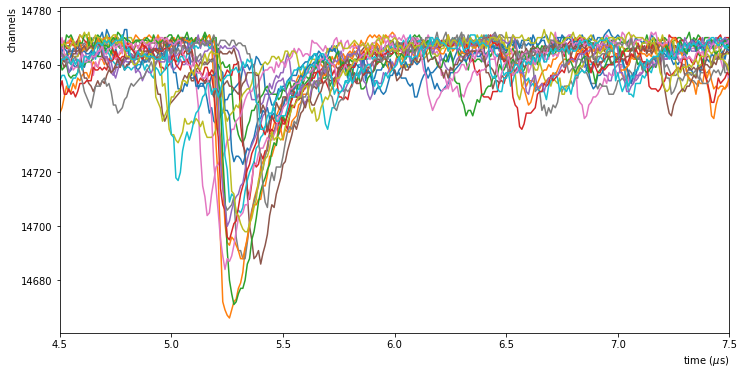

In [6]:
wf2 = new_wf[(new_data['area']>10)&(new_data['area']<20)]
psu.plot_waveforms( wf2,events=20,tlim=(4.5,7.5))

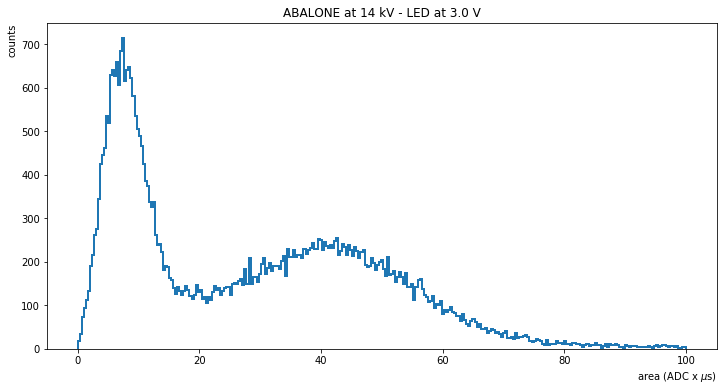

In [7]:
pau.plot_pe_spectrum(new_data['area'], volts=avolt, low=0, high=100, bins=300, ledv=3)

In [ ]:
peakint = pau.calculate_integrals( new_wf, nn=0, volts=avolt, sipmv = 32, ledv = '4', plot = 0, save = 1 )

In [ ]:
pau.plot_pe_spectrum(peakint, volts=avolt, low=0, high=100, bins=300, ledv=4)